In [1]:
import pandas as pd
import numpy as np
from scipy import spatial
import geopy.distance
import requests
import json
import geopy.distance
import timeit
from datetime import datetime
from PvGis import PvGis
import numpy as np
import pandas as pd
import json
import matplotlib
import rasterio
from rasterio.plot import show
import rioxarray as rxr
from osgeo import gdal
import csv
import math

In [2]:
#Read in port locations and distances
df_distances = pd.read_csv('Data/path/distances.csv')
df_ports = pd.read_csv('Data/path/ports.csv')
df_routes = pd.read_csv('Data/path/routes.csv')

#Read in level 1 renewable plant locations [lon, lat, kWh/kWp yearly, average W/m2 yearly]
df_ren = pd.read_csv('Data/renewables.csv')
#delete weird column
del df_ren['Unnamed: 0']
#change distance to km
df_ren['Gen-Port Driving Dist.'] = df_ren['Gen-Port Driving Dist.'] / 1000 

In [3]:
end_location = [6.990782485863093, 51.01643476555592]      #Leverkusen  [long, lat]  (opposite of google maps)
end_long = end_location[0]
end_lat = end_location[1]

In [4]:
coords = df_ports['coords'].values.tolist()
coords = [i.strip('()') for i in coords]
coords = [i.strip("'),'") for i in coords]
coords = [i.split(', ') for i in coords]

coords2=[]
for i in range(len(coords)):
    li=[]
    for j in range(2):
                li.append(float(coords[i][j]))
    coords2.append(li)   

In [5]:
#find closest port to end location
pt = end_location  # <-- the point to find

nearest = coords2[spatial.KDTree(coords2).query(pt)[1]] # <-- the nearest point 

distance,index = spatial.KDTree(coords2).query(pt)

print(distance)
end_port_code = df_ports.loc[index, 'Unnamed: 0']
#print(index)
coords2[index]

2.2968355406932557


[6.978047335715699, 53.313235000000006]

In [6]:
#Get straight line distance
direct_distance = geopy.distance.distance((reversed(end_location)),(reversed(coords2[index])))

In [7]:
#Get driving distance
# call the OSMR API
r = requests.get(f"http://router.project-osrm.org/route/v1/car/{end_location[0]},{end_location[1]};{coords2[index][0]},{coords2[index][1]}?overview=false""")
# then you load the response using the json libray
# by default you get only one alternative so you access 0-th element of the `routes`
routes = json.loads(r.content)
route_1 = routes.get("routes")[0]
driving_distance = route_1["distance"] / 1000

In [8]:
print(direct_distance)
print(driving_distance)
print(end_port_code)

255.56747321885115 km
305.8304
3915


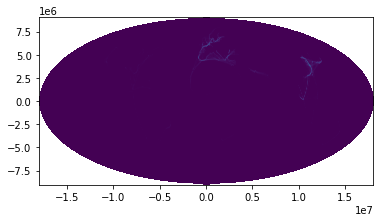

1
(19305, 38610)
PROJCS["World_Mollweide",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433]],PROJECTION["Mollweide"],PARAMETER["central_meridian",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Time:  205.5510104


In [2]:
start = timeit.default_timer()


            
stop = timeit.default_timer()

print('Time: ', stop - start)